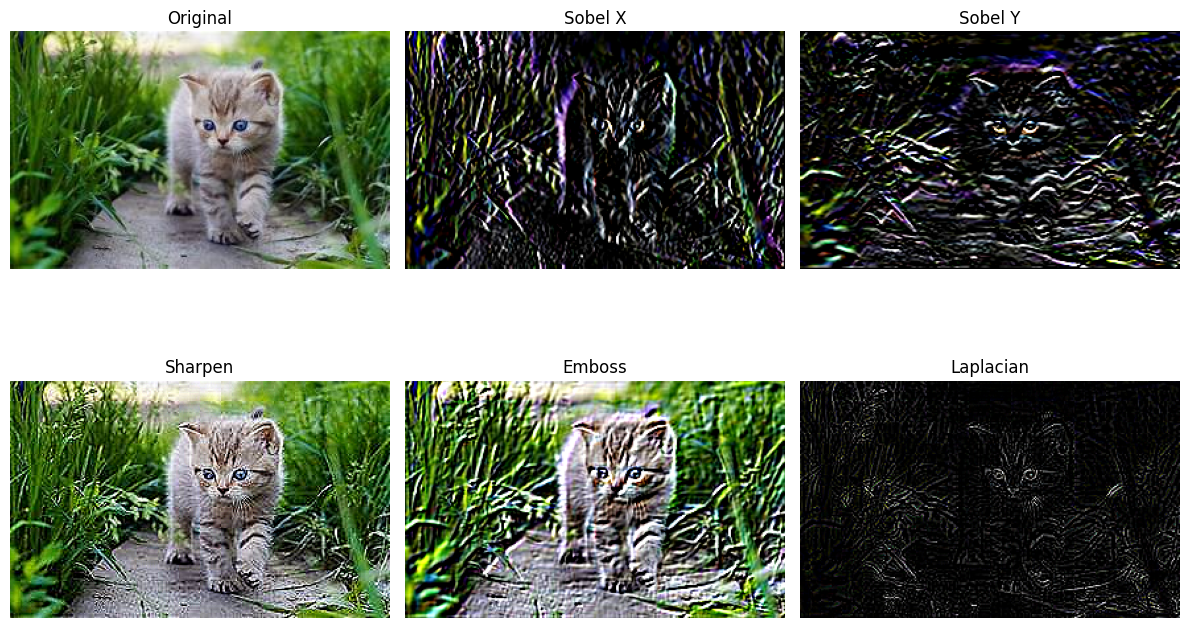

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the colored image
image = cv2.imread('/content/FilterImage.jpeg')  # Load as BGR (default in OpenCV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Function to apply a filter to each channel separately
def apply_filter(image, kernel):
    filtered_channels = [cv2.filter2D(image[:, :, i], -1, kernel) for i in range(3)]
    return cv2.merge(filtered_channels)

# Define convolutional kernels
kernels = {
    "Sobel X": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),  # Horizontal edges
    "Sobel Y": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),  # Vertical edges
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
}

# Apply filters
filtered_images = {name: apply_filter(image, kernel) for name, kernel in kernels.items()}

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

for i, (name, filtered_img) in enumerate(filtered_images.items(), 2):
    plt.subplot(2, 3, i)
    plt.imshow(filtered_img)
    plt.title(name)
    plt.axis("off")

plt.tight_layout()
plt.show()
